In [ ]:
# Importing all necessary dependencies and packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

<h1> Importing and Selecting Data </h1>

We decided to do our final project on the movies released by Marvel. However, putting together data that could be modeled successfully by the methods taught in the course was difficult, as the number of data points was quite low. To begin, we found a CSV file on GitHub that had a decent catalogue of movies, but did not include recent films. We added those films, as well as films that pertained to Marvel but were outside of the <i>Disney</i> MCU, manually to our dataset.

On top of the existing columns, we added *director*, *prior_knowledge* and (how many films/TV shows a view had to watch to fully enjoy the film). We also appended a *profit* column, which was calculated as *box_office* - *budget*.


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
address = '/content/drive/MyDrive/me371/mcu-movies.xlsx'

df = pd.read_excel(address, 'mcu-movies w dates')
# Sorts the df into movies released in chronological order
df = df.sort_values(by="release_date", ascending=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1> Exploring Data </h1>

The target variable that we want our models to predict for will be related to *box_office* or the revenue of the film. So, we plotted a lot of the factors described in the dataset against total revenue (described by the *profit* column). We also analyzed the correlation coefficients between variables to better inform what factors we will select for our regression models.

Variables that seem to have correlation:
<ul>
<li> runtime and budget
<li> runtime and box office
<li> runtime and profit (makes sense, since runtime has relatively strong correlation with budget and box office)
<li> prior knowledge and phase (obviously)
<li> box office and revenue percentage (obviously)
<li> box office and profit (obviously)
</ul>

The correlated factors listed as obvious relationships are because they are intrinsically/implicitly linked, and will be disregarded when developing the models for this project. Currently, the strongest correlation is between runtime and finance.

Text(0.5, 1.0, 'Revenue Percentage vs Critic Score')

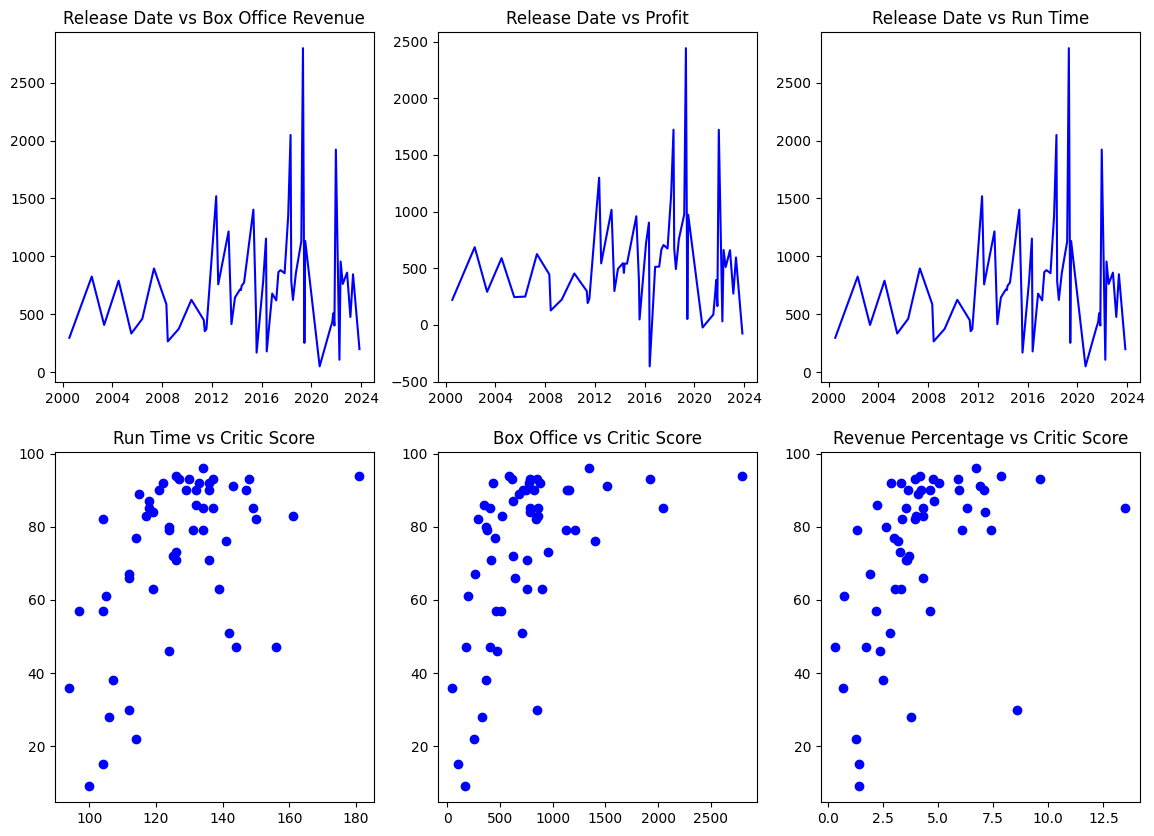

In [ ]:
date = df['release_date']
rev = df['box_office']
run = df['running_time']
crit = df['rt_critic_score']
div = df['division']

df['profit'] = df['box_office']-df['budget']
profit = df['profit']

expl_fig = plt.figure(figsize = (14,10))

expl_fig.add_subplot(2, 3, 1)
plt.plot(date, rev, color='b')
plt.title("Release Date vs Box Office Revenue")

expl_fig.add_subplot(2, 3, 2)
plt.plot(date, profit, color='b')
plt.title("Release Date vs Profit")

expl_fig.add_subplot(2, 3, 3)
plt.plot(date, rev, color='b')
plt.title("Release Date vs Run Time")

expl_fig.add_subplot(2, 3, 4)
plt.scatter(run, crit, color='b')
plt.title("Run Time vs Critic Score")

expl_fig.add_subplot(2, 3, 5)
plt.scatter(rev, crit, color='b')
plt.title("Box Office vs Critic Score")

expl_fig.add_subplot(2, 3, 6)
plt.scatter(div, crit, color='b')
plt.title("Revenue Percentage vs Critic Score")

In [ ]:
df.corr()

<ipython-input-26-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,phase,running_time,budget,box_office,rt_critic_score,rt_audience_score,prior_kno,division,profit
phase,1.000000,0.238791,0.309360,0.016866,-0.266046,0.247570,0.671521,-0.113590,-0.024417
running_time,0.238791,1.000000,0.575962,0.658774,0.489194,0.465849,0.390642,0.241891,0.588188
budget,0.309360,0.575962,1.000000,0.384985,0.087350,0.128164,0.404479,-0.220902,0.219025
box_office,0.016866,0.658774,0.384985,1.000000,0.498329,0.378421,0.486567,0.644645,0.984835
rt_critic_score,-0.266046,0.489194,0.087350,0.498329,1.000000,0.704730,0.230564,0.460823,0.510416
rt_audience_score,0.247570,0.465849,0.128164,0.378421,0.704730,1.000000,0.401863,0.342247,0.375976
prior_kno,0.671521,0.390642,0.404479,0.486567,0.230564,0.401863,1.000000,0.139293,0.438366
division,-0.113590,0.241891,-0.220902,0.644645,0.460823,0.342247,0.139293,1.000000,0.723048
profit,-0.024417,0.588188,0.219025,0.984835,0.510416,0.375976,0.438366,0.723048,1.000000


<h1>Developing a Regression Model</h1>

This model will be used to predict profit from runtime.

<h1>Developing a KNN Model</h1>

We decided to manually classify the movies in the dataset on a scale from "flop", meaning the film did worse than the budget and lost money, to "banger", meaning the film surpassed it's budget several times over.

Classification:
<ol>
<li> <b>S-Tier</b>: more than 600% of revenue
<li> <b>A-Tier</b>: between 400% and 600% of revenue
<li> <b>B-Tier</b>: between 250% and 400% of revenue
<li> <b>C-Tier</b>: between 100% and 250% of revenue
<li> <b>F-Tier</b>: less than 100% of revenue
</ol>

The cutoff points were assigned based on